# Step 1 

### Load the Wine dataset and build the dataframe
### Clean Data and Standardizetion dataframe


In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [4]:
y = wine.target

wine_df = pd.DataFrame(wine.data)
wine_df.columns = wine.feature_names

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler()
stand_wine_df = pd.DataFrame(scaler.fit_transform(wine_df),columns = wine_df.columns,index = wine_df.index)

stand_wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# Step 2 

### Concatenating multiple feature extraction methods

In [7]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [11]:
X = stand_wine_df

pca  = PCA(n_components = 2)

selection = SelectKBest(k = 1)

combined_features = FeatureUnion([('pca',pca),('univ_select',selection)])

X_features  = combined_features.fit(X,y).transform(X)

X_features[:5]

array([[ 3.31675081, -1.44346263,  1.03481896],
       [ 2.20946492,  0.33339289,  0.73362894],
       [ 2.51674015, -1.0311513 ,  1.21553297],
       [ 3.75706561, -2.75637191,  1.46652465],
       [ 1.00890849, -0.86983082,  0.66335127]])

In [12]:
svm = SVC(kernel = 'linear')

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.8166666666666667, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.7833333333333333, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.896551724137931, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.7833333333333333, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.75, total=   0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=10, score=0.9333333333333333, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=1, svm__C=10 
[CV]  features__pca__n_components=2, features__univ_select__k=1, svm__C=10, score=0.9827586206896551, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1, score=0.9333333333333333, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1, score=0.9166666666666666, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=2, features__univ_select__k=2, svm__C=0.1, score=0.9827586206896551, total=   0.0s
[CV] features__pca__n_components=2, features__univ_select__k=2, svm__C=1 
[CV]  features__pca__n_components=2, fea

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.4s finished


# Step 3 

### K-means Clustering 

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [51]:
np.random.seed(5)

X = stand_wine_df

y = wine.target

estimators = [('k_means_wine_8', KMeans(n_clusters=8)),
              ('k_means_wine_3', KMeans(n_clusters=3)),
              ('k_means_wine_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1 
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

## Step 3 part 1
### Clustering wine data by feature 'alcohol', 'malic_acid', and 'ash'

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


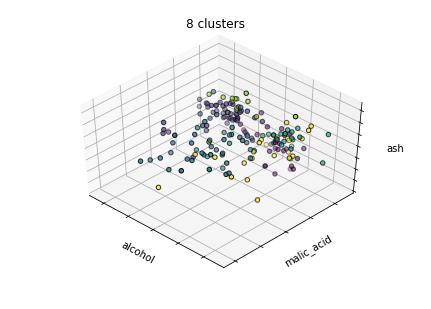

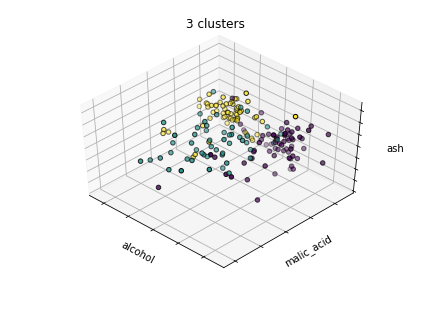

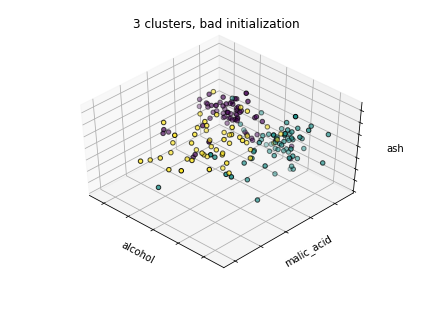

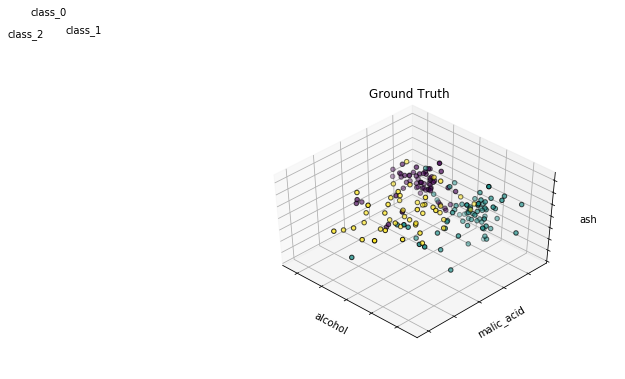

In [52]:
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 4))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X['alcohol'], X['malic_acid'], X['ash'],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('alcohol')
    ax.set_ylabel('malic_acid')
    ax.set_zlabel('ash')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

fig = plt.figure(fignum,figsize = (6,4))

ax = Axes3D(fig,rect=[0, 0, .95, 1], elev=48, azim=134)


#y = np.choose(y, [0, 1, 2]).astype(np.float)


ax.scatter(X['alcohol'], X['malic_acid'], X['ash'], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('alcohol')
ax.set_ylabel('malic_acid')
ax.set_zlabel('ash')
ax.set_title('Ground Truth')
ax.dist = 12

X_data = wine.data

for name, label in [('class_0', 0),
                    ('class_1', 1),
                    ('class_2', 2)]:
    ax.text3D(X_data[y == label, 0].mean(),
              X_data[y == label, 1].mean(),
              X_data[y == label, 2].mean()+2 , name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

fig.show()
    

    

## Step 3 part 2 

### cluster by the decomposed 3 features in X_feature in step 2 

In [55]:
X_features [:5]

array([[ 3.31675081, -1.44346263,  1.03481896],
       [ 2.20946492,  0.33339289,  0.73362894],
       [ 2.51674015, -1.0311513 ,  1.21553297],
       [ 3.75706561, -2.75637191,  1.46652465],
       [ 1.00890849, -0.86983082,  0.66335127]])

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


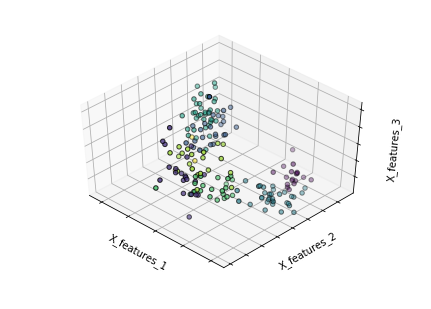

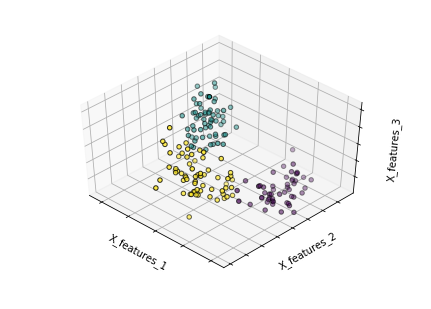

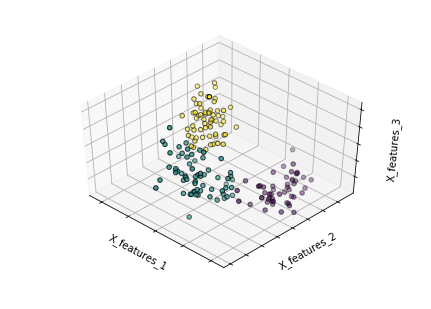

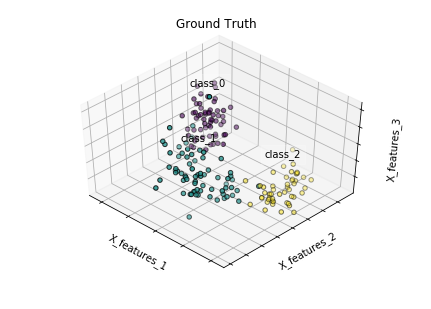

In [57]:
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 4))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X_features[:,0], X_features[:,1], X_features[:,2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('X_features_1')
    ax.set_ylabel('X_features_2')
    ax.set_zlabel('X_features_3')
    #ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

fig = plt.figure(fignum,figsize = (6,4))

ax = Axes3D(fig,rect=[0, 0, .95, 1], elev=48, azim=134)


#y = np.choose(y, [0, 1, 2]).astype(np.float)


ax.scatter(X_features[:,0], X_features[:,1], X_features[:,2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('X_features_1')
ax.set_ylabel('X_features_2')
ax.set_zlabel('X_features_3')
ax.set_title('Ground Truth')
ax.dist = 12



for name, label in [('class_0', 0),
                    ('class_1', 1),
                    ('class_2', 2)]:
    ax.text3D(X_features[y == label, 0].mean(),
              X_features[y == label, 1].mean(),
              X_features[y == label, 2].mean()+2 , name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

fig.show()
    

## Conclusion

### Compared with random choosed 3 features from dataset to do clustering, 
### the decomposion PCA is really significant.

# Step 4

## PCA with wine data

In [61]:
from sklearn import decomposition

np.random.seed(5)

centers = [[1,1],[-1,-1],[1,-1]]

X = stand_wine_df
y = wine.target


pca = decomposition.PCA(n_components = 3)
pca.fit(X)

X = pca.transform(X)

print(X[:5])
print(y)

[[ 3.31675081 -1.44346263 -0.16573904]
 [ 2.20946492  0.33339289 -2.02645737]
 [ 2.51674015 -1.0311513   0.98281867]
 [ 3.75706561 -2.75637191 -0.17619184]
 [ 1.00890849 -0.86983082  2.02668822]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


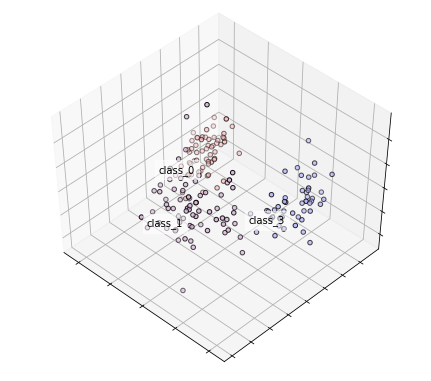

In [63]:
fig = plt.figure(1,figsize = (6,5))
plt.clf()

ax = Axes3D(fig,rect = [0,0,0.95,1],elev=48,azim=134)
plt.cla()

for name, label in [('class_0', 0), ('class_1', 1), ('class_3', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# Step 5

### LDA for the wine data

In [64]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = stand_wine_df
y = wine.target

lda = LinearDiscriminantAnalysis(n_components = 2)

pca = PCA(n_components = 2)

X_pca = pca.fit(X,y).transform(X)

X_lda = lda.fit(X,y).transform(X)

print(X_pca [:5])
print(X_lda [:5])

[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]]
[[-4.70024401  1.97913835]
 [-4.30195811  1.17041286]
 [-3.42071952  1.42910139]
 [-4.20575366  4.00287148]
 [-1.50998168  0.4512239 ]]


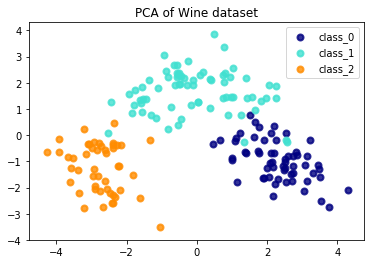

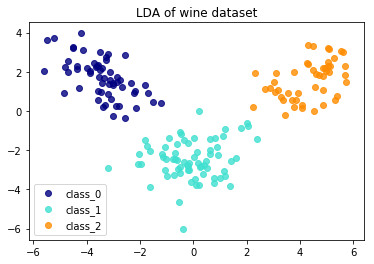

In [66]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
target_names = wine.target_names

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Wine dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of wine dataset')

plt.show()

# Step 6
## SVM

In [69]:
from sklearn import svm

X = wine.data
y = wine.target

X = X[y != 0, :2]
y = y[y !=0]

n_sameple = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)


X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]


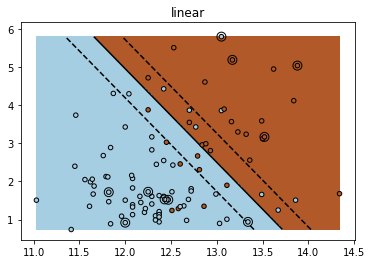

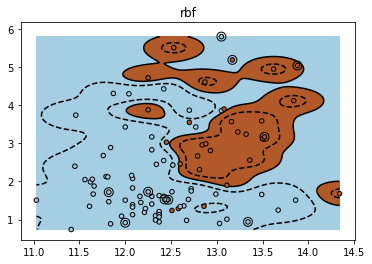

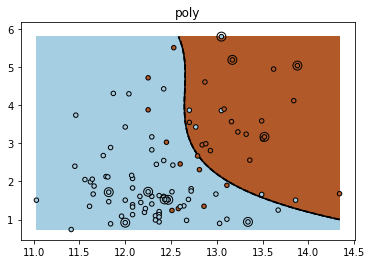

In [70]:
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

# Step 7 
## GPC

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

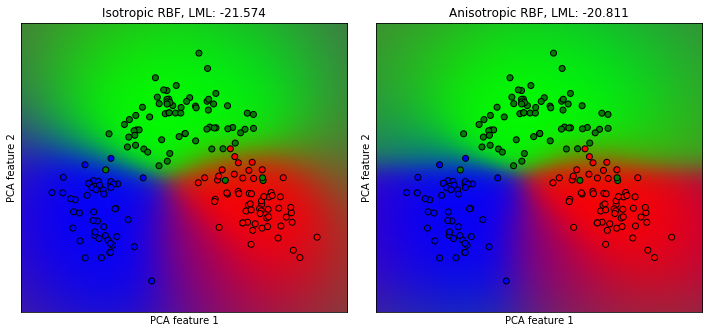

In [73]:
X = X_pca # PCA for wines data with 2 component
y = wine.target

h = 0.02

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))

for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y],
                edgecolors=(0, 0, 0))
    plt.xlabel('PCA feature 1')
    plt.ylabel('PCA feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("%s, LML: %.3f" %
              (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta)))

plt.tight_layout()
plt.show()


# Step 8 

### Logistic Regression 

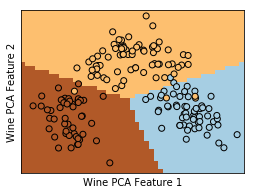

In [74]:
from sklearn import linear_model

X = X_pca
Y = wine.target

h = 0.2

logreg = linear_model.LogisticRegression(C=1e5)


logreg.fit(X, Y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Wine PCA Feature 1')
plt.ylabel('Wine PCA Feature 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Step 9 

### Nearest Neighbors 

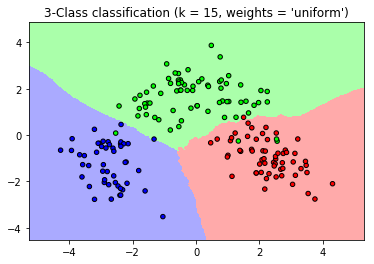

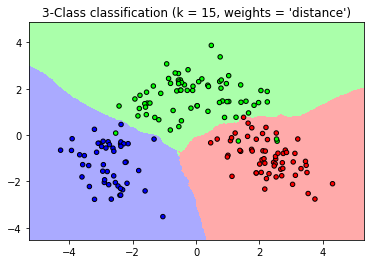

In [76]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 15

X = X_pca
y = wine.target

h = .02 


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

   
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

   
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# Step 10 

### Importance of Feature Scaling 



In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))



Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%



In [81]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


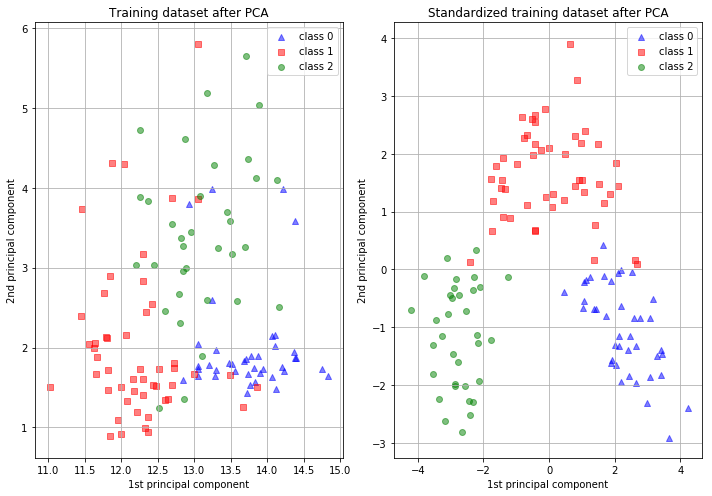

In [82]:
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

# Step 11

## Plot different SVM classifiers 


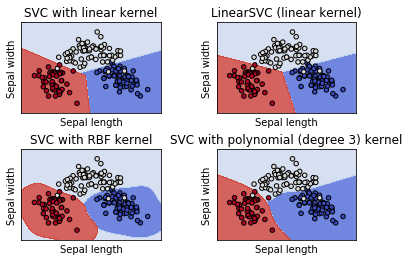

In [84]:
from sklearn import svm

X = X_pca 
y = wine.target

C = 1.0

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)



def make_meshgrid(x, y, h=.02):
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()